# Exploratory Data Analysis- Detection of Swallowing Disorders

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import ExcelWriter
import os
import numpy as np
import random
plt.style.use("seaborn")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

### Loading the dataset

In [2]:
healthy = pd.read_excel("D:/DATA SCIENCE/INTERNSHIP PROJECT/Modelling/HealthySamples.xlsx")
healthy = healthy[healthy["Sample status"] == "Perfect"]
healthy["Swallow_type"] = "healthy"
unhealthy = pd.read_excel("D:/DATA SCIENCE/INTERNSHIP PROJECT/Modelling/UnHealthySamples.xlsx")
unhealthy = unhealthy[unhealthy["Sample status"] == "Perfect"]
unhealthy["Swallow_type"] = "unhealthy"
data = healthy.append(unhealthy)[["Patient", "Sensor1_max", "Sensor2_max", "Sensor3_min", "Latency", "UES_start", "UES_end", "UES_Duration", "Swallow_type"]]
data["Label"] = np.where(data["Swallow_type"] == "healthy", 0, 1)
data

,Patient,Sensor1_max,Sensor2_max,Sensor3_min,Latency,UES_start,UES_end,UES_Duration,Swallow_type,Label
0,Control 1.txt,192.279698,113.474479,-20.601968,-0.028,1552.752,1553.392,0.640,healthy,0
1,Control 1.txt,167.821012,98.336004,-11.776150,-0.028,1782.184,1782.896,0.712,healthy,0
2,Control 1.txt,171.739528,249.844358,-24.181735,-0.036,611.556,612.284,0.728,healthy,0
3,Control 1.txt,200.377661,107.578393,-16.358434,-0.092,2333.764,2334.412,0.648,healthy,0
4,Control 1.txt,193.675898,105.770199,-25.335317,-0.172,1697.164,1697.784,0.620,healthy,0
...,...,...,...,...,...,...,...,...,...,...
194,HD11A.txt,114.937700,101.913100,-27.384550,0.211,117.157,117.828,0.671,unhealthy,1
195,HD11A.txt,195.568900,97.228870,-14.957330,0.200,163.116,164.111,0.995,unhealthy,1
196,HD11A.txt,200.185000,116.615400,-9.014693,-0.042,124.009,124.538,0.529,unhealthy,1
197,HD11B.txt,209.113400,79.385630,-12.359970,0.192,61.255,61.856,0.601,unhealthy,1


### Descriptive Statistics of a dataset

#### Healthy Class

In [3]:
healthy[["Sensor1_max", "Sensor2_max", "Sensor3_min", "Latency", "UES_Duration"]].describe()

,Sensor1_max,Sensor2_max,Sensor3_min,Latency,UES_Duration
count,124.000000,124.000000,124.000000,124.000000,124.000000
mean,124.158939,129.857740,-9.502119,0.145363,0.845387
std,44.465992,53.531787,7.791889,0.128389,0.222639
min,80.599680,44.151980,-33.376059,-0.172000,0.436000
25%,92.439345,89.732204,-13.897917,0.056000,0.664000
50%,110.516137,119.357977,-9.127947,0.150000,0.828000
75%,137.118334,161.465438,-3.650721,0.239250,0.981000
max,274.703593,250.000000,8.228428,0.532000,1.892000


#### Unhealthy Class

In [4]:
unhealthy[["Sensor1_max", "Sensor2_max", "Sensor3_min", "Latency", "UES_Duration"]].describe()

,Sensor1_max,Sensor2_max,Sensor3_min,Latency,UES_Duration
count,120.000000,120.000000,120.000000,120.000000,120.000000
mean,144.082960,145.538535,-13.641965,0.159658,0.814517
std,51.947881,79.275492,7.535588,0.103103,0.199220
min,80.756810,47.114770,-48.677570,-0.142000,0.420000
25%,98.738570,88.117125,-17.293390,0.104500,0.671000
50%,134.162300,127.453150,-12.117235,0.166500,0.786500
75%,170.505650,174.013475,-8.784615,0.217500,0.955000
max,309.871200,435.149900,1.642600,0.573000,1.601000


## Histogram of Independent features for Healthy Samples

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'UES_Duration')]

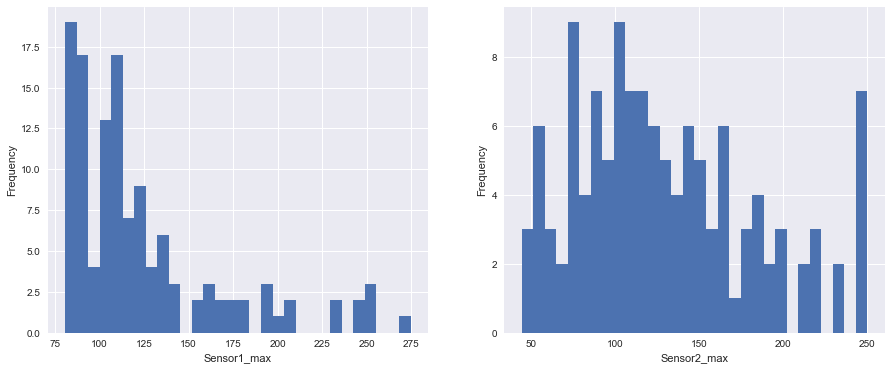

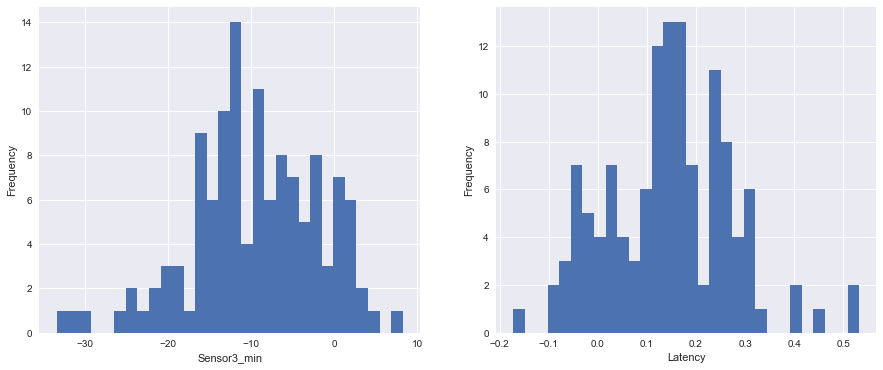

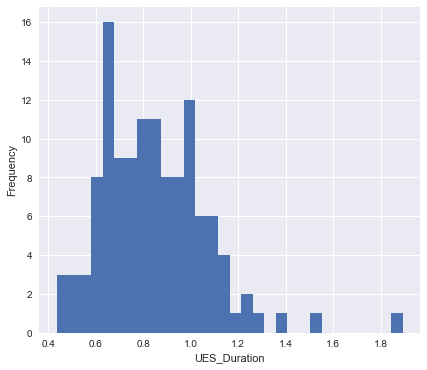

In [5]:
#fig, (ax1, ax2) = plt.subplots(1, 2)
# plt.subplots()
f = plt.figure(figsize=(15,6))
f1 = plt.figure(figsize=(15,6))
f2 = plt.figure(figsize=(15,6))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax3 = f1.add_subplot(121)
ax4 = f1.add_subplot(122)
ax5 = f2.add_subplot(122)
# plt.subplot2grid((3,3), (0,0), colspan=3)
# healthy[["Sensor1_max", "Sensor2_max", "Sensor3_min", "Latency", "UES_Duration"]].hist(bins = 10, figsize=(15, 8))
ax.hist(healthy["Sensor1_max"], bins = 30)
ax.set(xlabel='Sensor1_max', ylabel='Frequency')
ax2.hist(healthy["Sensor2_max"], bins = 30)
ax2.set(xlabel='Sensor2_max', ylabel='Frequency')
ax3.hist(healthy["Sensor3_min"], bins = 30)
ax3.set(xlabel='Sensor3_min', ylabel='Frequency')
ax4.hist(healthy["Latency"], bins = 30)
ax4.set(xlabel='Latency', ylabel='Frequency')
ax5.hist(healthy["UES_Duration"], bins = 30)
ax5.set(xlabel='UES_Duration', ylabel='Frequency')

## Density Plots of Independent features for healthy Samples

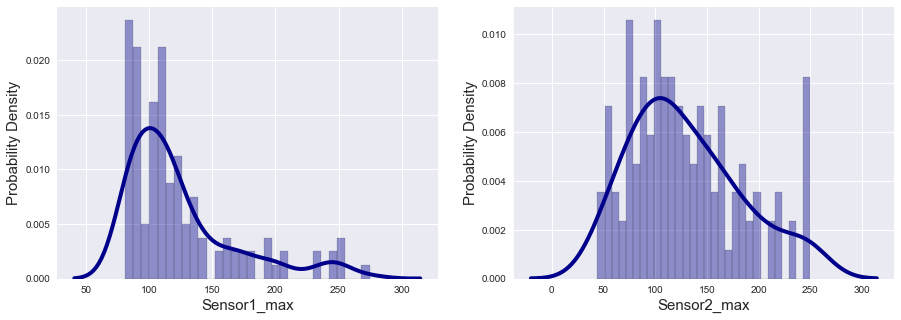

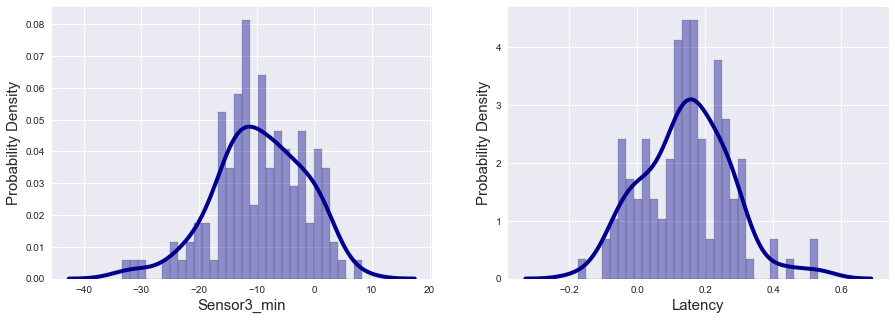

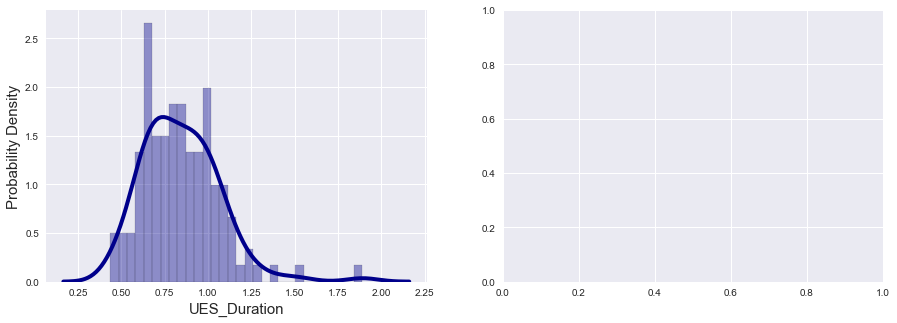

In [6]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
f, axes1 = plt.subplots(1, 2,figsize=(15,5))
f, axes2 = plt.subplots(1, 2,figsize=(15,5))
axes2[0].set(ylabel="Probability Density")
axes[0].set(ylabel="Probability Density")
axes[1].set(ylabel="Probability Density")
axes1[0].set(ylabel="Probability Density")
axes1[1].set(ylabel="Probability Density")
axes2[0].xaxis.label.set_size(15)
axes2[0].yaxis.label.set_size(15)
axes[0].xaxis.label.set_size(15)
axes[0].yaxis.label.set_size(15)
axes[1].xaxis.label.set_size(15)
axes[1].yaxis.label.set_size(15)
axes1[0].xaxis.label.set_size(15)
axes1[0].yaxis.label.set_size(15)
axes1[1].xaxis.label.set_size(15)
axes1[1].yaxis.label.set_size(15)
sns.distplot(healthy["Sensor1_max"], hist=True, kde=True, 
            bins=30,color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax=axes[0])
sns.distplot(healthy["Sensor2_max"], hist=True, kde=True, 
            bins=30,color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax=axes[1])
sns.distplot(healthy["Sensor3_min"], hist=True, kde=True, 
            bins=30,color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax=axes1[0])
sns.distplot(healthy["Latency"], hist=True, kde=True, 
            bins=30,color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax=axes1[1])
sns.distplot(healthy["UES_Duration"], hist=True, kde=True, 
            bins=30,color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax=axes2[0])

## Histogram of Independent features for UnHealthy Samples

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'UES_Duration')]

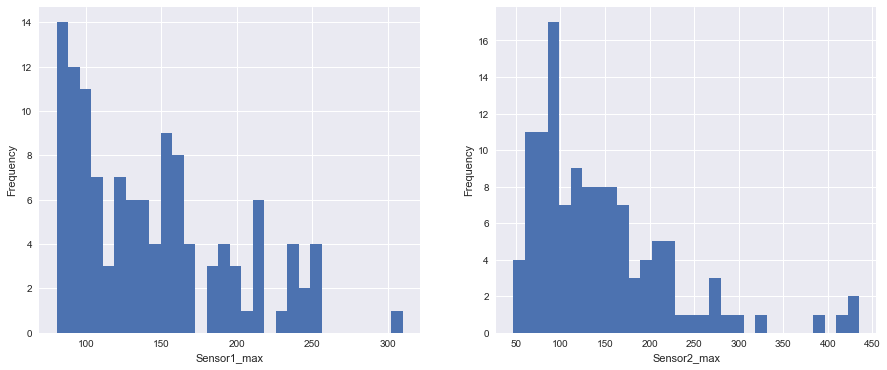

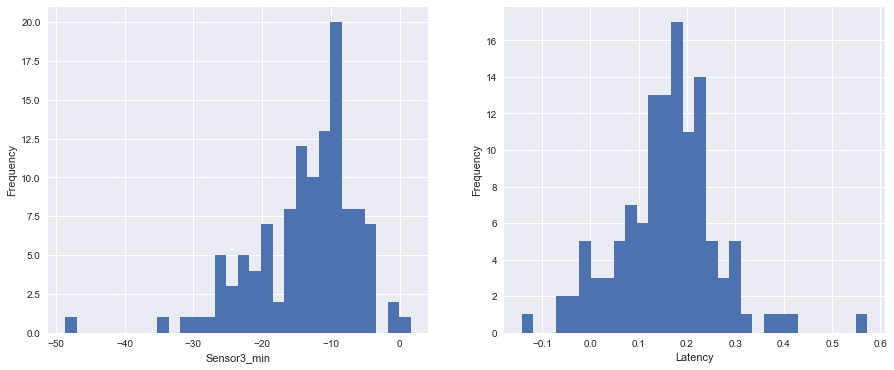

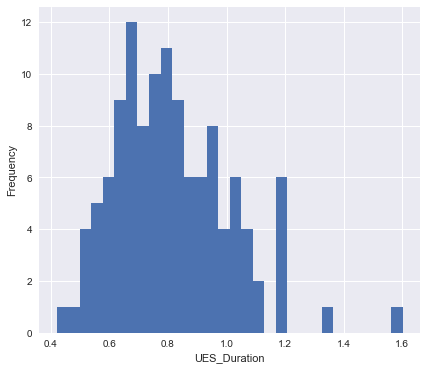

In [7]:
#fig, (ax1, ax2) = plt.subplots(1, 2)
# plt.subplots()
f = plt.figure(figsize=(15,6))
f1 = plt.figure(figsize=(15,6))
f2 = plt.figure(figsize=(15,6))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax3 = f1.add_subplot(121)
ax4 = f1.add_subplot(122)
ax5 = f2.add_subplot(122)
# plt.subplot2grid((3,3), (0,0), colspan=3)
# healthy[["Sensor1_max", "Sensor2_max", "Sensor3_min", "Latency", "UES_Duration"]].hist(bins = 10, figsize=(15, 8))
ax.hist(unhealthy["Sensor1_max"], bins = 30)
ax.set(xlabel='Sensor1_max', ylabel='Frequency')
ax2.hist(unhealthy["Sensor2_max"], bins = 30)
ax2.set(xlabel='Sensor2_max', ylabel='Frequency')
ax3.hist(unhealthy["Sensor3_min"], bins = 30)
ax3.set(xlabel='Sensor3_min', ylabel='Frequency')
ax4.hist(unhealthy["Latency"], bins = 30)
ax4.set(xlabel='Latency', ylabel='Frequency')
ax5.hist(unhealthy["UES_Duration"], bins = 30)
ax5.set(xlabel='UES_Duration', ylabel='Frequency')

## Density Plots of Independent features for healthy Samples

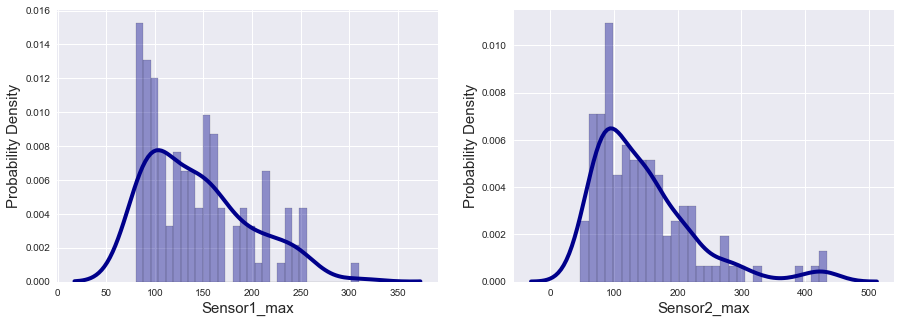

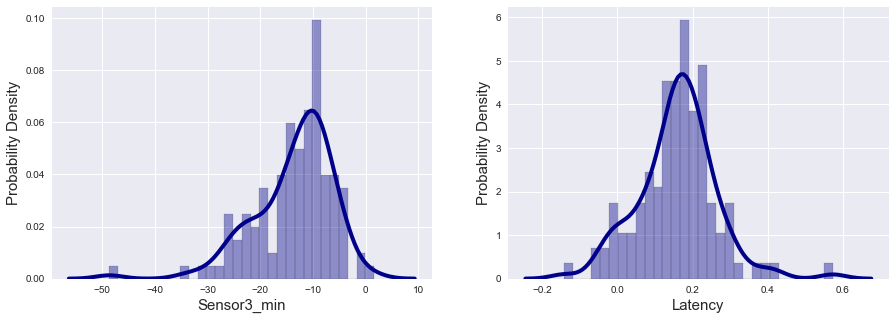

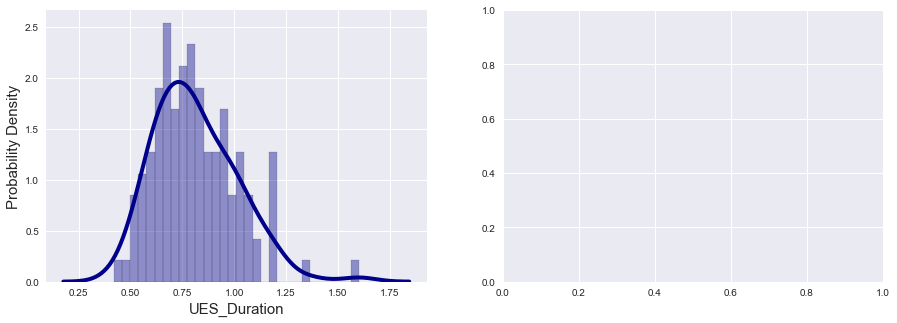

In [8]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
f, axes1 = plt.subplots(1, 2,figsize=(15,5))
f, axes2 = plt.subplots(1, 2,figsize=(15,5))
axes2[0].set(ylabel="Probability Density")
axes[0].set(ylabel="Probability Density")
axes[1].set(ylabel="Probability Density")
axes1[0].set(ylabel="Probability Density")
axes1[1].set(ylabel="Probability Density")
axes2[0].xaxis.label.set_size(15)
axes2[0].yaxis.label.set_size(15)
axes[0].xaxis.label.set_size(15)
axes[0].yaxis.label.set_size(15)
axes[1].xaxis.label.set_size(15)
axes[1].yaxis.label.set_size(15)
axes1[0].xaxis.label.set_size(15)
axes1[0].yaxis.label.set_size(15)
axes1[1].xaxis.label.set_size(15)
axes1[1].yaxis.label.set_size(15)
sns.distplot(unhealthy["Sensor1_max"], hist=True, kde=True, 
            bins=30,color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax=axes[0])
sns.distplot(unhealthy["Sensor2_max"], hist=True, kde=True, 
            bins=30,color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax=axes[1])
sns.distplot(unhealthy["Sensor3_min"], hist=True, kde=True, 
            bins=30,color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax=axes1[0])
sns.distplot(unhealthy["Latency"], hist=True, kde=True, 
            bins=30,color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax=axes1[1])
sns.distplot(unhealthy["UES_Duration"], hist=True, kde=True, 
            bins=30,color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax=axes2[0])

### Correlation matrix of Independent variables

In [9]:
corr = data[["Sensor1_max", "Sensor2_max", "Sensor3_min", "Latency", "UES_Duration"]].corr()
corr.style.background_gradient(cmap='coolwarm')

,Sensor1_max,Sensor2_max,Sensor3_min,Latency,UES_Duration
Sensor1_max,1,-0.0346022,-0.038871,0.149575,0.0296155
Sensor2_max,-0.0346022,1,-0.124292,0.0283056,0.056447
Sensor3_min,-0.038871,-0.124292,1,-0.0584012,0.063469
Latency,0.149575,0.0283056,-0.0584012,1,0.316552
UES_Duration,0.0296155,0.056447,0.063469,0.316552,1


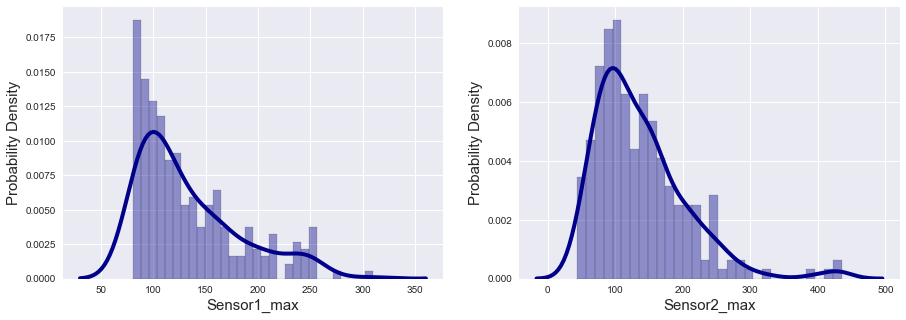

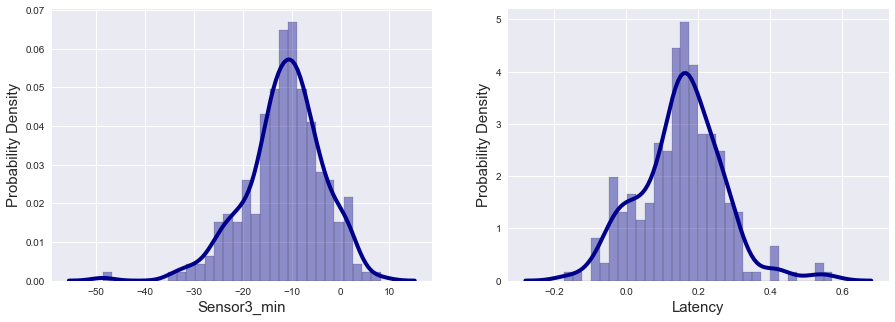

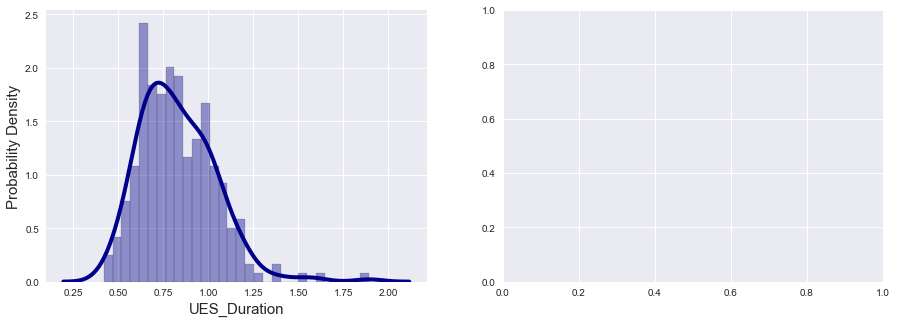

In [10]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
f, axes1 = plt.subplots(1, 2,figsize=(15,5))
f, axes2 = plt.subplots(1, 2,figsize=(15,5))
axes2[0].set(ylabel="Probability Density")
axes[0].set(ylabel="Probability Density")
axes[1].set(ylabel="Probability Density")
axes1[0].set(ylabel="Probability Density")
axes1[1].set(ylabel="Probability Density")
axes2[0].xaxis.label.set_size(15)
axes2[0].yaxis.label.set_size(15)
axes[0].xaxis.label.set_size(15)
axes[0].yaxis.label.set_size(15)
axes[1].xaxis.label.set_size(15)
axes[1].yaxis.label.set_size(15)
axes1[0].xaxis.label.set_size(15)
axes1[0].yaxis.label.set_size(15)
axes1[1].xaxis.label.set_size(15)
axes1[1].yaxis.label.set_size(15)
sns.distplot(data["Sensor1_max"], hist=True, kde=True, 
            bins=30,color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax=axes[0])
sns.distplot(data["Sensor2_max"], hist=True, kde=True, 
            bins=30,color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax=axes[1])
sns.distplot(data["Sensor3_min"], hist=True, kde=True, 
            bins=30,color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax=axes1[0])
sns.distplot(data["Latency"], hist=True, kde=True, 
            bins=30,color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax=axes1[1])
sns.distplot(data["UES_Duration"], hist=True, kde=True, 
            bins=30,color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax=axes2[0])